## School project - 5MLDE

The following notebook was created for a school project to create an anime recommendation system. The subject and the questions are available in the appendix.

The group members who participated in this project are:

    AMIMI Lamine
    BEZIN Théo
    LECOMTE Alexis
    PAWLOWSKI Maxence


## 1 - Data analysis

In [5]:


# OS and filesystem
from pathlib import Path

# Math
import numpy

# Data
import pandas
from matplotlib import pyplot
import matplotx

# Console output
from colorama import Fore, Style

# Misc.
from ast import literal_eval

from pandas_profiling import ProfileReport


In [6]:
pyplot.rcParams.update(pyplot.rcParamsDefault)
pyplot.style.use(matplotx.styles.dracula)  # Set the matplotlib style

In [7]:
# Filesystem paths
PARENT_FOLDER = Path.cwd()
DATA_FOLDER = (PARENT_FOLDER / ".." / ".." / "data").resolve()
MODELS_FOLDER = (PARENT_FOLDER / ".." / ".." / "models").resolve()

# Plots
FIG_SIZE = (12, 7)

# Misc.
RANDOM_STATE = 2077

### Dataset loading

In [69]:
data_android = pandas.read_csv((DATA_FOLDER / "Android_Malware.csv"))
data_android.columns = data_android.columns.str.strip()
data_android

C:\Users\alamine\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (56,58,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355625,405,172.217.7.14-10.42.0.211-80-38405-6,172.217.7.14,80,10.42.0.211,38405.0,6.0,17/06/2017 01:29:11,126711,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355626,406,10.42.0.211-10.42.0.1-7632-53-17,10.42.0.211,7632,10.42.0.1,53.0,17.0,17/06/2017 01:30:33,48012,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355627,407,10.42.0.211-104.192.110.245-45970-443-6,10.42.0.211,45970,104.192.110.245,443.0,6.0,17/06/2017 01:29:45,20028018,11,...,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,Benign
355628,408,10.42.0.211-10.42.0.1-51982-53-17,10.42.0.211,51982,10.42.0.1,53.0,17.0,17/06/2017 01:29:45,347926,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


#### Duplicated values

In [70]:
def duplicated_values(df, df_name: str = None) -> None:
    # Compute the dataset size, the count of duplicated value and the list of duplicated values
    data_count = df.shape[0] * df.shape[1]
    duplicated_count = df.duplicated().sum()
    duplicated = df[df.duplicated(keep=False)] if (duplicated_count > 0) else None

    # Show the result
    df_name = f" ({df_name})" if df_name is not None else ""
    print(f"{Style.BRIGHT}Duplicated values{df_name}:{Style.RESET_ALL} {duplicated_count} ({round((duplicated_count.sum() / data_count) * 100, 2)}%)")
    if duplicated is not None:
        print(duplicated)


duplicated_values(df=data_android, df_name="Android")

Duplicated values (Android): 2885 (0.01%)
        Unnamed: 0                                 Flow ID       Source IP  \
205925          90   203.205.158.60-10.42.0.211-80-48574-6  203.205.158.60   
205929          94   10.42.0.211-111.206.25.159-33521-80-6  111.206.25.159   
206273         438   10.42.0.211-106.39.169.66-38659-443-6     10.42.0.211   
206310         475    10.42.0.211-119.146.74.34-36805-80-6   119.146.74.34   
206311         476    10.42.0.211-119.146.74.48-33523-80-6   119.146.74.48   
...            ...                                     ...             ...   
328145         406   10.42.0.211-118.178.143.65-50070-80-6     10.42.0.211   
328146         407    140.205.61.26-10.42.0.211-80-47648-6     10.42.0.211   
328147         408    140.205.61.26-10.42.0.211-80-47648-6     10.42.0.211   
328148         409   10.42.0.211-121.41.62.82-44183-1088-6     10.42.0.211   
328149         410  10.42.0.211-101.37.105.10-48779-6880-6     10.42.0.211   

        Source Port  

There is only 0.01% of duplicated values, we can afford to delete the rows where there are duplicated values

In [71]:
data_android.drop_duplicates(keep="first", inplace=True)

#### Null and empty values

In [72]:
def missing_values(df, df_name: str = None, keep_zeros=True) -> None:
    # Compute the dataset size and the count of missing value
    data_count = df.shape[0] * df.shape[1]
    missing = missing_df = df.isna().sum()

    # Filter out column with zero missing value
    if not keep_zeros:
        missing_df = missing_df[missing_df > 0]

    # Calculate the percent of missing values
    missing_df = missing_df.sort_values(ascending=False).apply(lambda m: f"{m} ({round((m * 100) / df.shape[0], 2)}%)")

    # Show the result
    df_name = f" ({df_name})" if df_name is not None else ""
    print((
        f"{Style.BRIGHT}Missing values{df_name}:{Style.RESET_ALL} {round((missing.sum() / data_count) * 100, 2)}%\n"
        f"{Style.DIM}{Fore.WHITE}{missing_df}{Style.RESET_ALL}"
    ))


missing_values(df=data_android, df_name="Android", keep_zeros=True)

Missing values (Android): 0.0%
Fwd Avg Bulk Rate       4 (0.0%)
act_data_pkt_fwd        4 (0.0%)
Fwd Avg Packets/Bulk    4 (0.0%)
Bwd Avg Bytes/Bulk      4 (0.0%)
Bwd Avg Packets/Bulk    4 (0.0%)
                          ...   
Fwd IAT Total           0 (0.0%)
Flow IAT Min            0 (0.0%)
Flow IAT Max            0 (0.0%)
Flow IAT Std            0 (0.0%)
Label                   0 (0.0%)
Length: 86, dtype: object


We can see only a very few amount of missing values, we can drop the only lines where there are missing values


In [73]:
data_android.dropna()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355625,405,172.217.7.14-10.42.0.211-80-38405-6,172.217.7.14,80,10.42.0.211,38405.0,6.0,17/06/2017 01:29:11,126711,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355626,406,10.42.0.211-10.42.0.1-7632-53-17,10.42.0.211,7632,10.42.0.1,53.0,17.0,17/06/2017 01:30:33,48012,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355627,407,10.42.0.211-104.192.110.245-45970-443-6,10.42.0.211,45970,104.192.110.245,443.0,6.0,17/06/2017 01:29:45,20028018,11,...,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,Benign
355628,408,10.42.0.211-10.42.0.1-51982-53-17,10.42.0.211,51982,10.42.0.1,53.0,17.0,17/06/2017 01:29:45,347926,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [74]:
data_android.Label.value_counts()

Android_Adware         147443
Android_Scareware      117070
Android_SMS_Malware     64524
Benign                  23708
Name: Label, dtype: int64

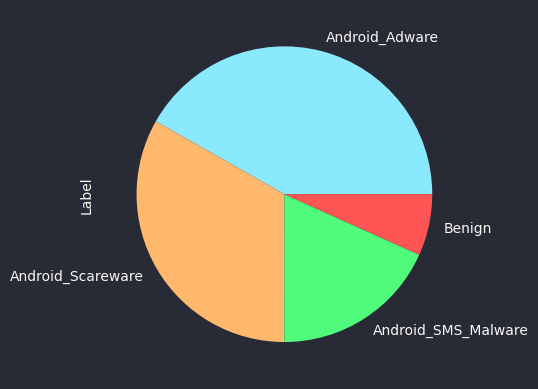

In [75]:
data_android.Label.value_counts().plot(kind="pie")
pyplot.show()

In [32]:
results = ProfileReport(data_android.head(20000), title="Android Malware Pandas Profiling Report")

In [14]:
results.to_file('report.html')

C:\Users\alamine\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
data_android.dtypes

Unnamed: 0             int64
 Source IP            object
 Source Port           int64
 Destination IP       object
 Destination Port    float64
                      ...   
Idle Mean            float64
 Idle Std            float64
 Idle Max            float64
 Idle Min            float64
Label                 object
Length: 85, dtype: object

In [83]:
# clean object columns
data_android['CWE Flag Count'] =  data_android['CWE Flag Count'].fillna(0)
data_android.drop(data_android.loc[data_android['CWE Flag Count'] == 'SCAREWARE'].index, inplace=True)
data_android['CWE Flag Count'] = data_android['CWE Flag Count'].astype(int)
data_android['CWE Flag Count'].value_counts(normalize=True)


0    1.0
Name: CWE Flag Count, dtype: float64

In [82]:
data_android.drop(data_android.loc[data_android['Fwd Avg Bytes/Bulk'] == 'BENIGN'].index, inplace=True)
data_android['Fwd Avg Bytes/Bulk'] = data_android['Fwd Avg Bytes/Bulk'].astype(float)
data_android['Fwd Avg Bytes/Bulk'].value_counts(normalize=True)

0.0    1.0
Name: Fwd Avg Bytes/Bulk, dtype: float64

In [96]:
data_android.drop(data_android.loc[data_android['Down/Up Ratio'] == 'BENIGN'].index, inplace=True)
data_android['Down/Up Ratio'] = data_android['Down/Up Ratio'].astype(float)
data_android['Down/Up Ratio'].value_counts(normalize=True)

0.0     0.491565
1.0     0.474189
2.0     0.025262
3.0     0.006668
4.0     0.001434
5.0     0.000405
6.0     0.000150
8.0     0.000125
7.0     0.000099
12.0    0.000037
9.0     0.000023
10.0    0.000020
11.0    0.000020
75.0    0.000003
Name: Down/Up Ratio, dtype: float64

In [90]:
#get all numerical columns
numeric_cols = data_android.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_cols)

['Unnamed: 0', 'Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag 

In [97]:
cat_columns = data_android.select_dtypes(include='object').columns
print(cat_columns)

Index(['Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'Label'], dtype='object')


In [95]:
from sklearn.model_selection import train_test_split

data_x = data_android.drop(["Label"], axis=1)
data_y = data_android["Label"]

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20)
print(f"Données d'entraînement : {Fore.LIGHTGREEN_EX}{x_train.shape}{Fore.RESET}")
print(f"Données de test : {Fore.LIGHTGREEN_EX}{x_test.shape}{Fore.RESET}")

Données d'entraînement : (282194, 85)
Données de test : (70549, 85)


In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


numeric_features = numeric_cols
categorical_features = ["Source IP", "Destination IP", "Timestamp"]

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features),
    ]
)
preprocessor.fit_transform(data_x)

<352743x79573 sparse matrix of type '<class 'numpy.float64'>'
	with 25044712 stored elements in Compressed Sparse Row format>

In [103]:
print(data_android.dtypes)


Unnamed: 0          int64
Flow ID            object
Source IP          object
Source Port         int64
Destination IP     object
                   ...   
Idle Mean         float64
Idle Std          float64
Idle Max          float64
Idle Min          float64
Label              object
Length: 86, dtype: object


In [102]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

print((
    f"Model score:\n"
    f"\t{Fore.WHITE}{Style.DIM}∟ train → {round(model_knn.score(x_train, y_train) * 100, 2)}%{Fore.WHITE}{Style.DIM})\n"
    f"\t{Fore.WHITE}{Style.DIM}∟ test → {round(model_knn.score(x_test, y_test) * 100, 2)}%{Fore.WHITE}{Style.DIM})"
))


ValueError: could not convert string to float: '10.42.0.151-98.139.183.24-34701-443-6'